In [ ]:

from models import MineNetBack, BrazilCFR, SEAsiaCFR
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [ ]:
simulations = 20000

In [ ]:
seasia_predict = SEAsiaCFR().predict()
seasia_std = self.get_SEAsiaCFR.std_12.iloc[-1]

In [ ]:
brazil_predict = BrazilCFR().predict()
brazil_std = self.get_BrazilCFR.std_12.iloc[-1]

In [ ]:
self = MineNetBack()

In [ ]:
const = self.const
quarterdummy = self.quarterly_dummy()

In [ ]:
ethanol = self.get_ethanol.iloc[-1]

In [ ]:
freightCost = self.get_freightCost.iloc[-1]

In [ ]:
mine_netbacks = []
for i in tqdm(range(self.simulations)):
    seasia0m = self.tri_distribute(seasia_predict,seasia_std)
    brazil0m = self.tri_distribute(brazil_predict,brazil_std)
    ethanol0m = self.tri_distribute(ethanol.E85,ethanol.std_12)
    freightCost0m = self.tri_distribute(freightCost.TotalCost,freightCost.std_8)
    mine_netbacks.append(const + quarterdummy + ethanol0m*self.EIAE85 + freightCost0m*self.FreightCost + seasia0m*self.SEAsia + brazil0m*self.BrazilCFR)

In [ ]:
pred_df = pd.DataFrame(mine_netbacks,columns=['Predictions'])
print("*"*50)
print(pred_df.describe())
print("*"*50)
pred_df.plot(kind='hist',bins=100,title=f'Mine Netback - {self.simulations} Iterations');
plt.show()
prediction = round(self.kde_max_density(pred_df)['Predictions'],2)
print(f"Max Density -->>> ${prediction}")
prediction

In [ ]:
freightCost.std_8

In [1]:
from models import MineNetBack

In [2]:
model = MineNetBack()

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:03<00:00, 5545.30it/s]


**************************************************
        Predictions
count  20000.000000
mean     834.654814
std       71.415129
min      650.216985
25%      782.727003
50%      834.935354
75%      885.708542
max     1013.361181
**************************************************


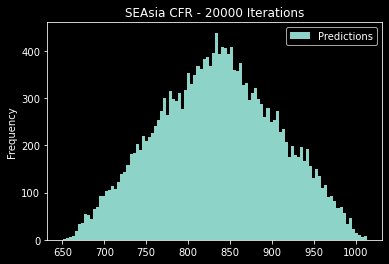

Max Density -->>> $838.7


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:06<00:00, 3087.86it/s]


**************************************************
        Predictions
count  20000.000000
mean    1093.707518
std       67.130543
min      896.671881
25%     1046.660117
50%     1093.866444
75%     1140.948167
max     1289.696178
**************************************************


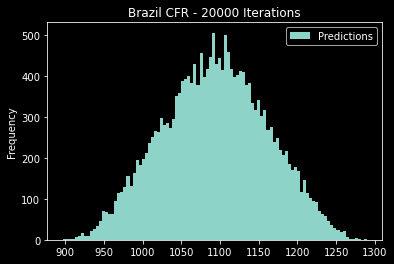

Max Density -->>> $1098.3


100%|█████████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 20120.73it/s]


**************************************************
        Predictions
count  20000.000000
mean     778.244663
std       44.570921
min      642.982902
25%      747.084237
50%      778.167451
75%      809.494865
max      915.958531
**************************************************


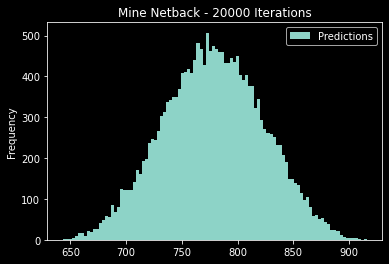

Max Density -->>> $775.37


775.37

In [3]:
model.predict()